## Dependencies

1. Install following (if not already available in docker container)

```
apt-get install ffmpeg libsm6 libxext6  -y
```

2. Install python wrapper

```
pip install opencv-contrib-python
```

3. Install OCR package

```
apt install tesseract-ocr
pip install pytesserat
```

4. Install 7 segment trained data

```
git clone https://github.com/Shreeshrii/tessdata_ssd
cp tessdata_ssd/7seg.traineddata /usr/share/tesseract-ocr/4.00/tessdata
cp tessdata_ssd/ssd.traineddata /usr/share/tesseract-ocr/4.00/tessdata
cp tessdata_ssd/ssd_int.traineddata /usr/share/tesseract-ocr/4.00/tessdata
```


In [41]:
import cv2
import numpy as np
import pytesseract

from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (8.0, 6.0) # this controls figure size in the notebook

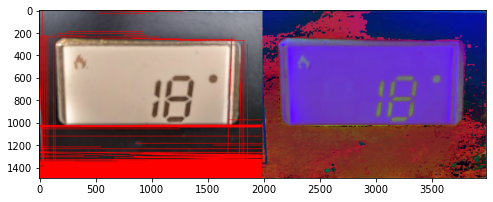

In [78]:
# Load an image using 'imread' specifying the path to image
input_image = cv2.imread('./assets/images/LCD_heating_18.jpeg')

plt.imshow(input_image)

gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
edges = cv2.Canny(gray, 120, 200)
plt.imshow(edges)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 150, minLineLength=10, maxLineGap=250)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(input_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.imshow(input_image, cmap='gray')

hori = np.concatenate((input_image, gray), axis=1)
plt.imshow(hori, cmap='gray')

In [61]:
is_normalized = False

# Load an image using 'imread' specifying the path to image
image = cv2.imread('./assets/images/LCD_heating_18.jpeg')

# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

# Get normalized histogram if it is required
if is_normalized:
    hist = np.divide(hist.ravel(), hist.max())

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  109.072265625


18



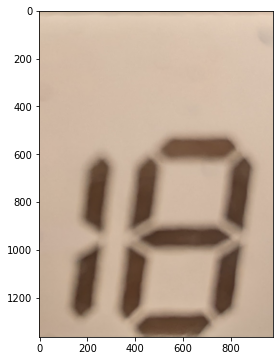

In [74]:
input_image = cv2.imread('./assets/images/LCD_heating_18_segmented.jpeg')

plt.imshow(input_image)

# Cvt to hsv
hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

# Get binary-mask
msk = cv2.inRange(hsv, np.array([0, 0, 175]), np.array([179, 255, 255]))
krn = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
dlt = cv2.dilate(msk, krn, iterations=1)
thr = 255 - cv2.bitwise_and(dlt, msk)

# OCR
d = pytesseract.image_to_string(thr, config="-l 7seg --psm 8") # best
#d = pytesseract.image_to_string(thr, config="-l ssd_int --psm 8")
#d = pytesseract.image_to_string(thr, config="-l 7seg --psm 8")
print(d)